# **Simple Support Vector Machine Classifier**


In [ ]:
# Importing needed libraries
from keras.utils import np_utils
from keras.datasets import mnist

import time

import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns

from sklearn.metrics import confusion_matrix

from sklearn.svm import SVC

from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

import warnings
warnings.simplefilter(action='ignore', category=Warning)

### Data Preprocessing Level

[The mnist dataset](https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz) by google api.

In [ ]:
# Load MNIST digit dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)




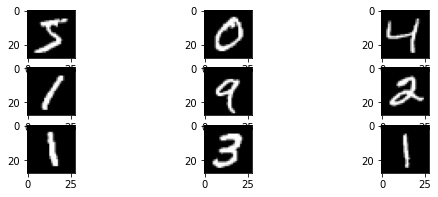

In [ ]:
# Plot a sample of the  data

# Dimensions of data
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))
print('\n')

plt.figure(figsize=(9, 3))
for i in range(9):  
  plt.subplot(330 + 1 + i)
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
  
plt.show()

#### Handling the data to fit the model

**“Normalizing”** a vector most often means dividing by a norm of the vector. It also often refers to rescaling by the minimum and range of the vector, to make all the elements lie between 0 and 1 thus bringing all the values of numeric columns in the dataset to a common scale.

The goal of **normalization** is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values.

In [ ]:
# Reshaping input size
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])

# Normalization
x_train = x_train / 255.0
x_test = x_test / 255.0

**Principal component analysis (PCA)**:

Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD.

Building a heuristic function to calculate the number of components according to our dataset.

Text(0, 0.5, 'cumulative explained variance')

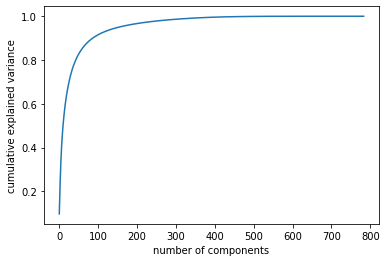

In [ ]:
pca = PCA(svd_solver='randomized', whiten=True).fit(x_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
n_components = 16 # using only for testing so we lower the training time

pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(x_train)

In [ ]:
# Transform the data
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

0.594166081380405

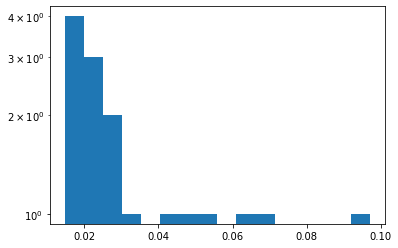

In [ ]:
plt.hist(pca.explained_variance_ratio_, bins=n_components, log=True)
pca.explained_variance_ratio_.sum()

## Creating the model

Generally, Support Vector Machines is considered to be a classification approach, it but can be employed in both types of classification and regression problems. It can easily handle multiple continuous and categorical variables. SVM constructs a hyperplane in multidimensional space to separate different classes. SVM generates optimal hyperplane in an iterative manner, which is used to minimize an error. The core idea of SVM is to find a maximum marginal hyperplane(MMH) that best divides the dataset into classes.

* **Support Vectors**
Support vectors are the data points, which are closest to the hyperplane. These points will define the separating line better by calculating margins. These points are more relevant to the construction of the classifier.

* **Hyperplane**
A hyperplane is a decision plane which separates between a set of objects having different class memberships.

* **Margin**
A margin is a gap between the two lines on the closest class points. This is calculated as the perpendicular distance from the line to support vectors or closest points. If the margin is larger in between the classes, then it is considered a good margin, a smaller margin is a bad margin.

### Tuning Hyperparameters

#### Kernel

The main function of the kernel is to transform the given dataset input data into the required form. There are various types of functions such as linear, polynomial, and radial basis function (RBF). Polynomial and RBF are useful for non-linear hyperplane. Polynomial and RBF kernels compute the separation line in the higher dimension. In some of the applications, it is suggested to use a more complex kernel to separate the classes that are curved or nonlinear. This transformation can lead to more accurate classifiers.

* **Linear Kernel** is used when the data is Linearly separable, that is, it can be separated using a single Line. It is one of the most common kernels to be used. It is mostly used when there are a Large number of Features in a particular Data Set.

* The **polynomial kernel** is a kernel function commonly used with support vector machines (SVMs) and other kernelized models, that represents the similarity of vectors (training samples) in a feature space over polynomials of the original variables, allowing learning of non-linear models.

* **RBF kernels** are the most generalized form of kernelization and is one of the most widely used kernels due to its similarity to the Gaussian distribution. The RBF kernel function for two points X₁ and X₂ computes the similarity or how close they are to each other.

**GridSearchCV**: Exhaustive search over specified parameter values for an estimator. Using it help us cut down the boilerplate needed.

In [ ]:
param_grid = { "kernel" : ['linear', 'poly', 'rbf']}
clf = SVC()

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=2, n_jobs=-1, verbose=1)

gs = gs.fit(x_train_pca, y_train)

print(gs.best_score_)
print(gs.best_params_)

Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.3min finished


0.9627
{'kernel': 'rbf'}


#### Regularization & Gamma

**Regularization** parameter in python's Scikit-learn C parameter used to maintain regularization. Here C is the penalty parameter, which represents misclassification or error term. The misclassification or error term tells the SVM optimization how much error is bearable. This is how you can control the trade-off between decision boundary and misclassification term. A smaller value of C creates a small-margin hyperplane and a larger value of C creates a larger-margin hyperplane.

A lower value of **Gamma** will loosely fit the training dataset, whereas a higher value of gamma will exactly fit the training dataset, which causes over-fitting. In other words, you can say a low value of gamma considers only nearby points in calculating the separation line, while the a value of gamma considers all the data points in the calculation of the separation line.

In [ ]:
param_grid = { "C" : [0.001, 0.1, 100, 10e5]
              , "gamma" : [10,1,0.1,0.01]}

clf = SVC(kernel='rbf')
gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=2, n_jobs=-1, verbose=1)

gs = gs.fit(x_train_pca, y_train)

print(gs.best_score_)
print(gs.best_params_)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed: 45.5min finished


0.9670000000000001
{'C': 100, 'gamma': 0.1}


### Optimized Model

According to the previous heuristic function for PCA we use 100 components as max and try to find the best case for both accuracy and training time.

We get the following diagrams from continuous tests.

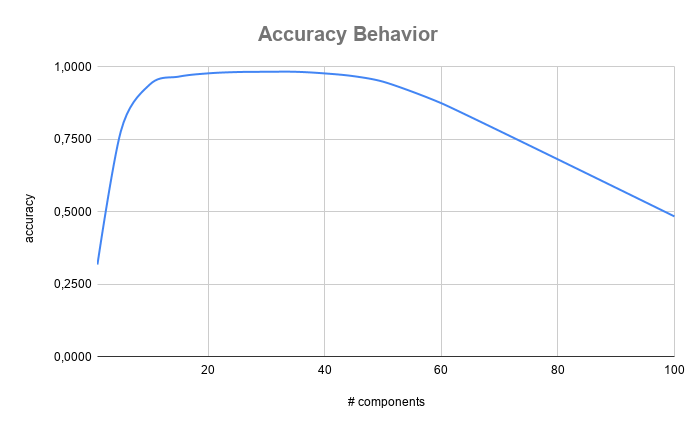

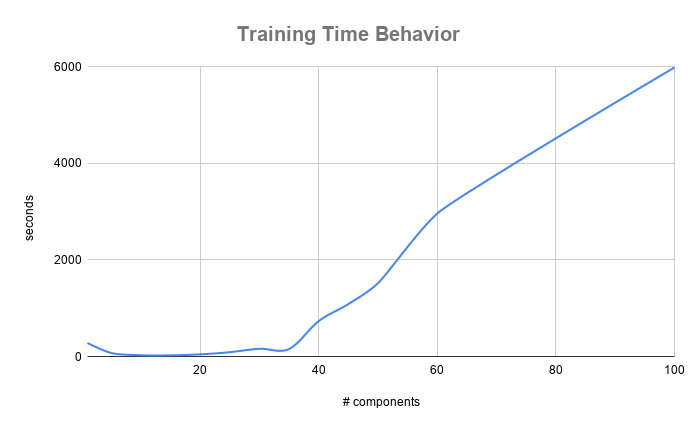

0.7236317954725104

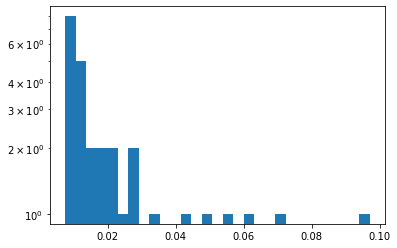

In [ ]:
n_components = 29 #Best scenario according to diagrams and tests.

pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(x_train)

x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

plt.hist(pca.explained_variance_ratio_, bins=n_components, log=True)
pca.explained_variance_ratio_.sum()

In [ ]:
# 29 components
#Create a SVM Classifier
best_clf = SVC(kernel='rbf',C=100, gamma=0.1)

#Fitting the model using the training set
start = time.time()
best_clf.fit(x_train_pca, y_train)
end = time.time()

print("Test Accuracy:", best_clf.score(x_test_pca, y_test))
print('Training time (seconds): ', end - start)

Test Accuracy: 0.9833
Training time (seconds):  132.3534038066864


## Evaluating best classifier

In [ ]:
# Code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,), dtype={int, float}
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

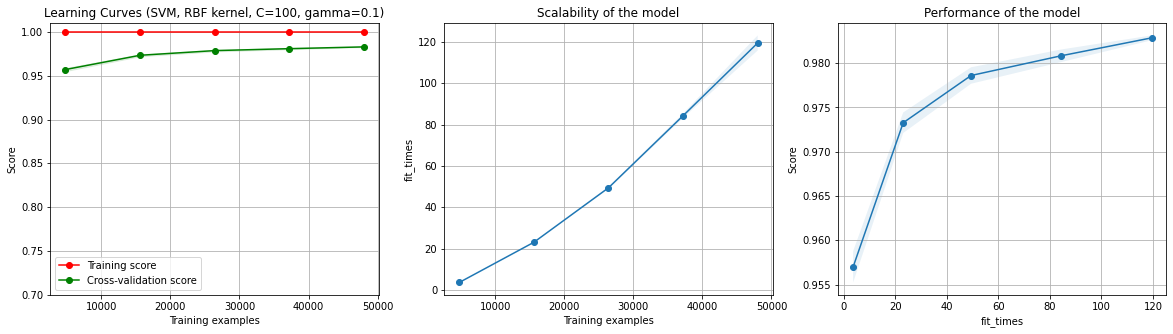

In [ ]:
title = "Learning Curves (SVM, RBF kernel, C=100, gamma=0.1)"

cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=0)

plot_learning_curve(best_clf, title, x_train_pca, y_train, axes=None, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=-1)

plt.show()

#### Consfusion Matrix

In [ ]:
y_pred=best_clf.predict(x_test_pca)
matrix = confusion_matrix(y_test, y_pred)
display(matrix)

array([[ 974,    0,    1,    0,    0,    0,    1,    1,    3,    0],
       [   0, 1128,    3,    1,    0,    0,    0,    0,    2,    1],
       [   4,    3, 1011,    3,    2,    0,    1,    3,    5,    0],
       [   1,    0,    1,  992,    0,    6,    0,    5,    4,    1],
       [   0,    0,    4,    0,  963,    0,    1,    0,    1,   13],
       [   3,    0,    0,    9,    1,  875,    2,    0,    2,    0],
       [   5,    1,    1,    0,    2,    2,  944,    0,    3,    0],
       [   0,    5,   10,    0,    1,    1,    0, 1004,    1,    6],
       [   2,    0,    2,    5,    1,    3,    0,    2,  958,    1],
       [   3,    3,    2,    6,    8,    2,    0,    1,    3,  981]])

In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

0.3564


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



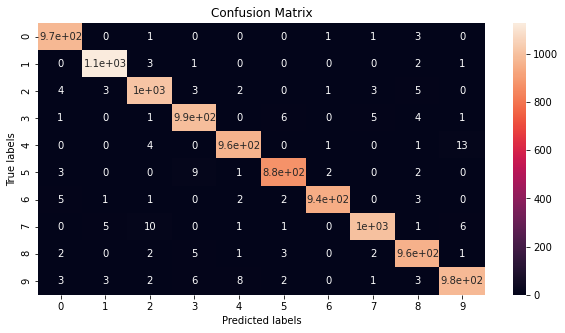

In [ ]:
plt.rcParams["figure.figsize"] = (10,5) # in order to increase the size of the plots

ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1','2', '3', '4', '5', '6', '7', '8', '9']); ax.yaxis.set_ticklabels(['0', '1','2', '3', '4', '5', '6', '7', '8', '9']);

## Sources

* https://machinelearningmastery.com/automate-machine-learning-workflows-pipelines-python-scikit-learn/

* https://datascience.stackexchange.com/questions/45900/when-to-use-standard-scaler-and-when-normalizer

* https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832

* https://www.geeksforgeeks.org/creating-linear-kernel-svm-in-python/

* https://gist.github.com/WittmannF/60680723ed8dd0cb993051a7448f7805

* https://towardsdatascience.com/radial-basis-function-rbf-kernel-the-go-to-kernel-acf0d22c798a

* https://stackoverflow.com/questions/12487060/matplotlib-color-according-to-class-labels

* https://towardsdatascience.com/a-complete-guide-to-principal-component-analysis-pca-in-machine-learning-664f34fc3e5a?gi=97fab4b82a7a

* https://stackoverflow.com/questions/53802098/how-to-choose-the-number-of-components-pca-scikitliear

* https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c

* https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html